### 목표 : 생선 분류 모델

-   데이터 : fish.csv
-   피쳐 : 5개 Weight,Length,Diagonal,Height,Width
-   타겟 : 1개 Species
-   방법 : 지도학습 + 다중분류


(1) 모듈로딩 및 데이터 준비 <hr>


In [1]:
# 모듈로딩
import pandas as pd
import numpy as np


In [2]:
# 데이터 준비
data_file = "../data/fish.csv"

fishDF = pd.read_csv(data_file)

fishDF.head(2)


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


(2) 학습 위한 데이터 준비 <hr>


(2-1) 피쳐와 타겟 분리


In [3]:
featureDF = fishDF[fishDF.columns[1:]]
targetDF = fishDF[fishDF.columns[0]]


In [4]:
print(f"featureDF : {featureDF.shape}, targetDF : {targetDF.shape}")


featureDF : (159, 5), targetDF : (159,)


In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(targetDF)


LabelEncoder()

In [6]:
targetDF = encoder.transform(targetDF)
print(targetDF)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


In [7]:
# 타겟의 클래스 수 확인
# targetDF.nunique()


In [8]:
# 타겟 클래스별 데이터 수 확인
# (targetDF.value_counts() / targetDF.shape[0]) * 100


(2-2) 학습용/테스트용 데이터셋 준비


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, targetDF, stratify=targetDF, random_state=11
)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=25, solver="liblinear")
model.fit(x_train, y_train)


LogisticRegression(max_iter=25, solver='liblinear')

In [12]:
# 모델 파라미터 확인
print(f"classes_ : {model.classes_}")
print(f"feature_names_in_ : {model.feature_names_in_}")
print(f"max_iter : {model.max_iter}")
print(f"n_iter_ : {model.n_iter_}")
print(f"coef_ : {model.coef_}")
print(f"intercept_ : {model.intercept_}")


classes_ : [0 1 2 3 4 5 6]
feature_names_in_ : ['Weight' 'Length' 'Diagonal' 'Height' 'Width']
max_iter : 25
n_iter_ : [20 22 19 18 17 16 19]
coef_ : [[ 1.31151754e-02 -1.64944470e+00  8.28009575e-01  1.41621595e+00
  -4.15067201e-01]
 [-2.10617657e-02  3.33701594e-01 -9.64909143e-01  2.19381184e+00
   2.66611701e-02]
 [-1.97453974e-03  2.60616873e+00 -2.66412260e+00 -7.93176743e-03
   1.91659551e+00]
 [ 1.01422059e-02  2.55168743e-01  1.51461260e-01 -1.94779290e+00
  -8.36602128e-01]
 [-9.89829706e-03 -1.72578825e+00  1.53807538e+00 -5.12880032e-01
   1.65750894e+00]
 [-7.29426634e-02  3.82049401e-01  1.62783679e-01 -1.55364795e+00
  -5.97839461e-01]
 [ 5.68775586e-03 -5.20399292e-01  2.54546484e-01 -2.46921990e-01
   8.40269158e-01]]
intercept_ : [-0.27362898  0.07982094 -0.34682853 -1.23222237 -1.32590576  0.41907035
 -0.34453293]


(4) 평가 <hr>


In [13]:
print(f"[Train Score] : {model.score(x_train, y_train)}")
print(f"[Test Score]  : {model.score(x_test, y_test)}")
print(f"[Difference]  : {model.score(x_test, y_test) - model.score(x_train, y_train)}")


[Train Score] : 0.9495798319327731
[Test Score]  : 0.975
[Difference]  : 0.02542016806722691


(5) 모델 활용 <hr>


In [14]:
y_pre = model.predict(x_test.iloc[[0]])
y_pre, y_test[:1]


(array([0]), array([0]))

In [15]:
# 5개 데이터에 대한 생선 분류 예측
print(model.classes_)
# np.round(model.predict_proba(x_test.iloc[:5]), 3), y_test[:5].to_list()
np.round(model.predict_proba(x_test.iloc[:5]), 3), y_test[:5]


[0 1 2 3 4 5 6]


(array([[0.504, 0.311, 0.   , 0.   , 0.173, 0.   , 0.012],
        [0.158, 0.73 , 0.044, 0.   , 0.057, 0.   , 0.01 ],
        [0.772, 0.024, 0.001, 0.   , 0.18 , 0.   , 0.023],
        [0.001, 0.089, 0.719, 0.002, 0.155, 0.004, 0.03 ],
        [0.   , 0.021, 0.753, 0.009, 0.176, 0.009, 0.031]]),
 array([0, 1, 0, 2, 2]))

In [16]:
result = model.predict_proba(x_test.iloc[:5]).argmax(axis=1)
result


array([0, 1, 0, 2, 2], dtype=int64)

In [17]:
data = {
    "Pre Y": [model.classes_[idx] for idx in result],
    # "True Y": y_test[:5].to_list(),
    "True Y": y_test[:5],
}


In [18]:
pd.DataFrame(data)


,Pre Y,True Y
0,0,0
1,1,1
2,0,0
3,2,2
4,2,2


(6) 모델 성능 평가 <hr>

-   정확도
-   정밀도
-   재현율
-   F1-Score
-   Confusion Matrix
-   Classification Report


In [19]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
)


In [20]:
print(classification_report(y_test, model.predict(x_test), zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.95      0.97      0.96        40



In [21]:
print(f1_score(y_test, model.predict(x_test), average="weighted"))


0.9629310344827587


In [22]:
recall_score(y_test, model.predict(x_test), average="micro")


0.975

In [25]:
cm = confusion_matrix(y_test, model.predict(x_test))
cm


array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [26]:
print("타겟 라벨", model.classes_)
labels = encoder.inverse_transform(model.classes_)
print("타겟 문자열 라벨", labels)


타겟 라벨 [0 1 2 3 4 5 6]
타겟 문자열 라벨 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


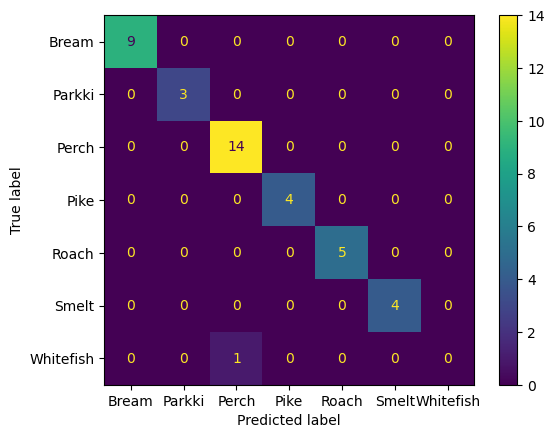

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmplot = ConfusionMatrixDisplay(cm, display_labels=labels)
cmplot.plot()
plt.show()
